# Initial Data Analysis

In this file, the load curves from the household and heat pump loads are initially analyzed and plotted.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

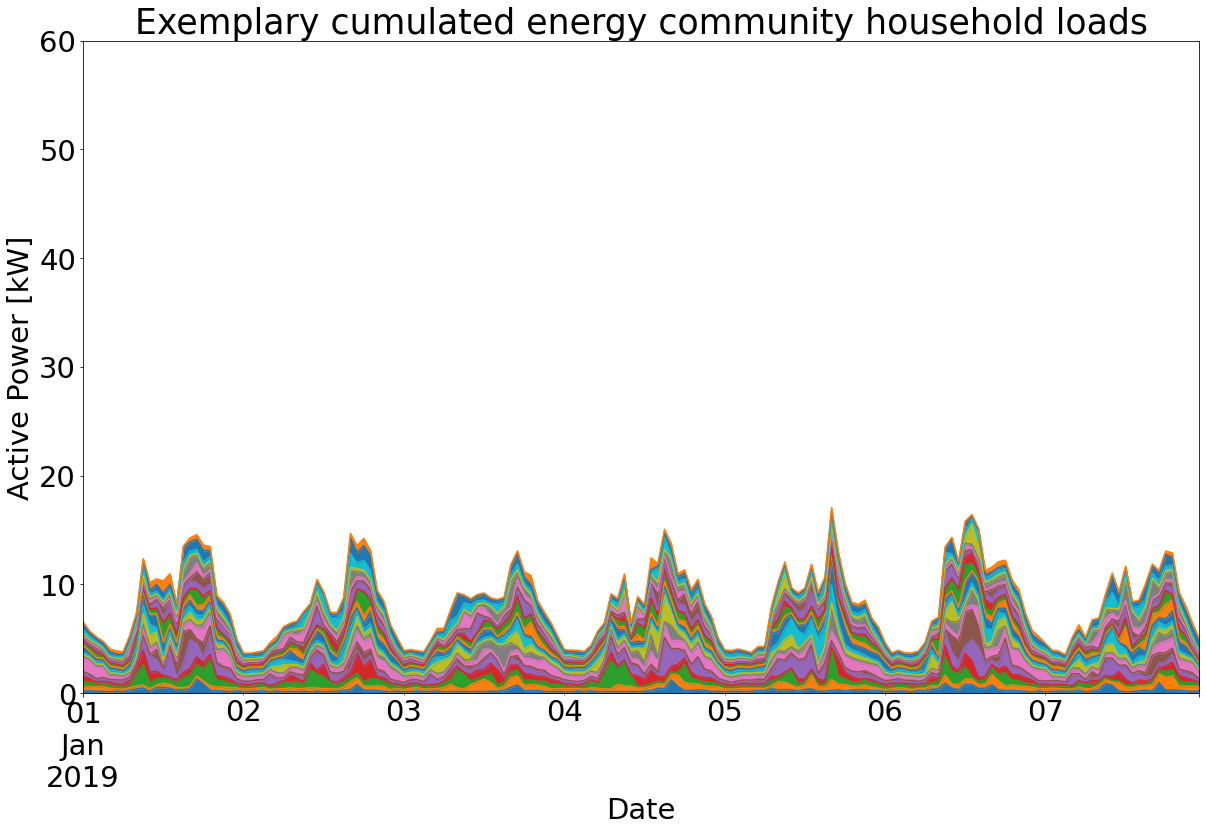

In [4]:
plt.rcParams.update({'font.size': 29})
df_hh_indi = pd.read_pickle("./data/1920 Final Data w. Additional Features HH Hourly Agg.pkl")
df_hh_indi[['SFH3_P_TOT', 'SFH4_P_TOT', 'SFH5_P_TOT', 'SFH7_P_TOT', 'SFH9_P_TOT',
       'SFH12_P_TOT', 'SFH14_P_TOT', 'SFH16_P_TOT', 'SFH18_P_TOT',
       'SFH19_P_TOT', 'SFH20_P_TOT', 'SFH21_P_TOT', 'SFH22_P_TOT',
       'SFH27_P_TOT', 'SFH28_P_TOT', 'SFH29_P_TOT', 'SFH30_P_TOT',
       'SFH32_P_TOT', 'SFH34_P_TOT', 'SFH36_P_TOT', 'SFH38_P_TOT',
       'SFH39_P_TOT']].applymap(lambda x:x/1000).iloc[:24*7].plot.area(figsize=(20,12),legend=False,ylim=(0,60),title="Exemplary cumulated energy community household loads",ylabel="Active Power [kW]",xlabel="Date")
plt.savefig('./plots/agg_households.pdf',bbox_inches='tight')




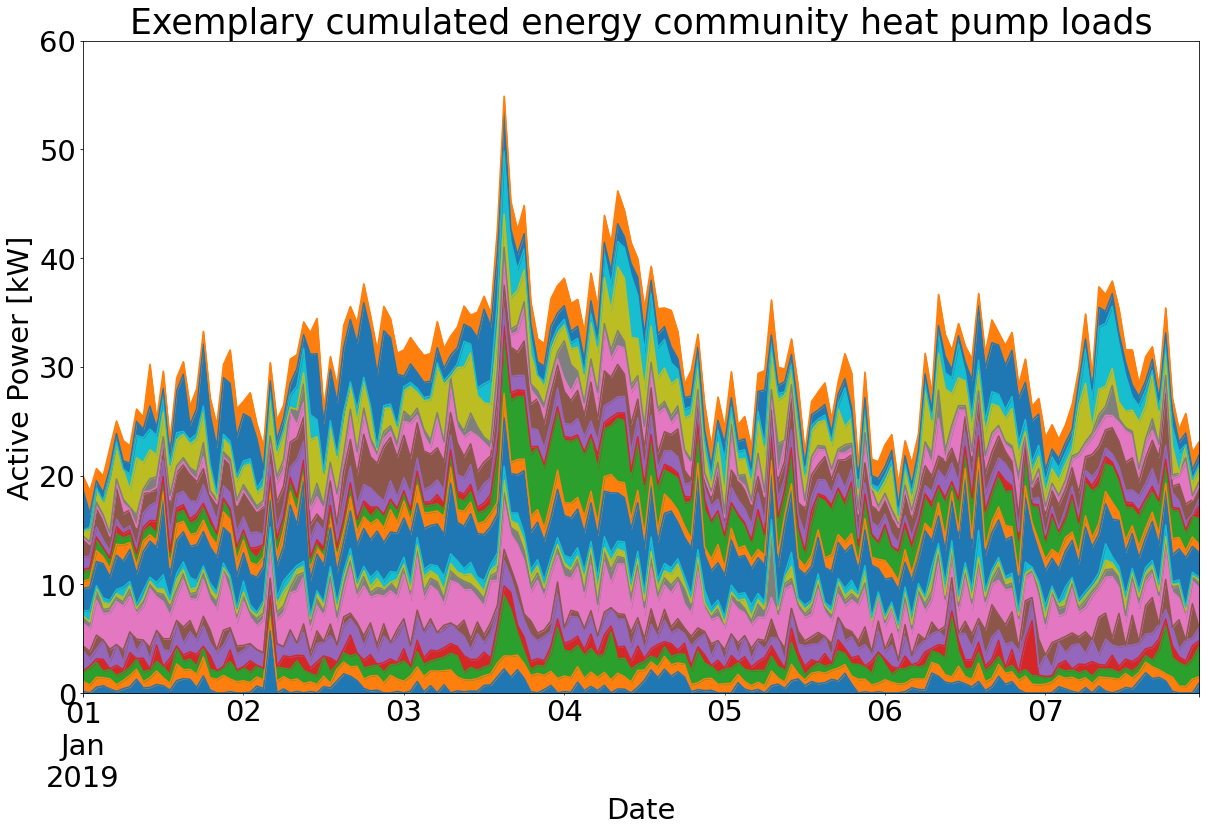

In [5]:
df_hh_indi = pd.read_pickle("./data/1920 Final Data w. Additional Features HP Hourly Agg.pkl")
df_hh_indi[['SFH3_P_TOT', 'SFH4_P_TOT', 'SFH5_P_TOT', 'SFH7_P_TOT', 'SFH9_P_TOT',
       'SFH12_P_TOT', 'SFH14_P_TOT', 'SFH16_P_TOT', 'SFH18_P_TOT',
       'SFH19_P_TOT', 'SFH20_P_TOT', 'SFH21_P_TOT', 'SFH22_P_TOT',
       'SFH27_P_TOT', 'SFH28_P_TOT', 'SFH29_P_TOT', 'SFH30_P_TOT',
       'SFH32_P_TOT', 'SFH34_P_TOT', 'SFH36_P_TOT', 'SFH38_P_TOT',
       'SFH39_P_TOT']].applymap(lambda x: x/1000).iloc[:24*7].plot.area(figsize=(20,12),ylim=(0,60),title="Exemplary cumulated energy community heat pump loads",legend=False,ylabel="Active Power [kW]",xlabel="Date")


plt.savefig('./plots/agg_heatpumps.pdf',bbox_inches='tight')


In [6]:
df_hp = pd.read_pickle("./data/Feature Selection aggregated heat pump load.pkl")

In [7]:
df_hh = pd.read_pickle("./data/Feature Selection aggregated household load.pkl")

In [8]:
df_comb = pd.read_pickle("./data/Feature Selection aggregated energy community load.pkl")

In [9]:
df_hh.max()

RELATIVE_HUMIDITY:TOTAL                   100.000
hour_cos                                    1.000
WIND_GUST_SPEED:TOTAL                      31.134
APPARENT_TEMPERATURE:TOTAL ROLLING 48      30.275
APPARENT_TEMPERATURE:TOTAL ROLLING 24      30.751
load_same_hour_last_7_days              14623.936
hour_sin                                    0.998
Agg Load                                20116.407
dtype: float64

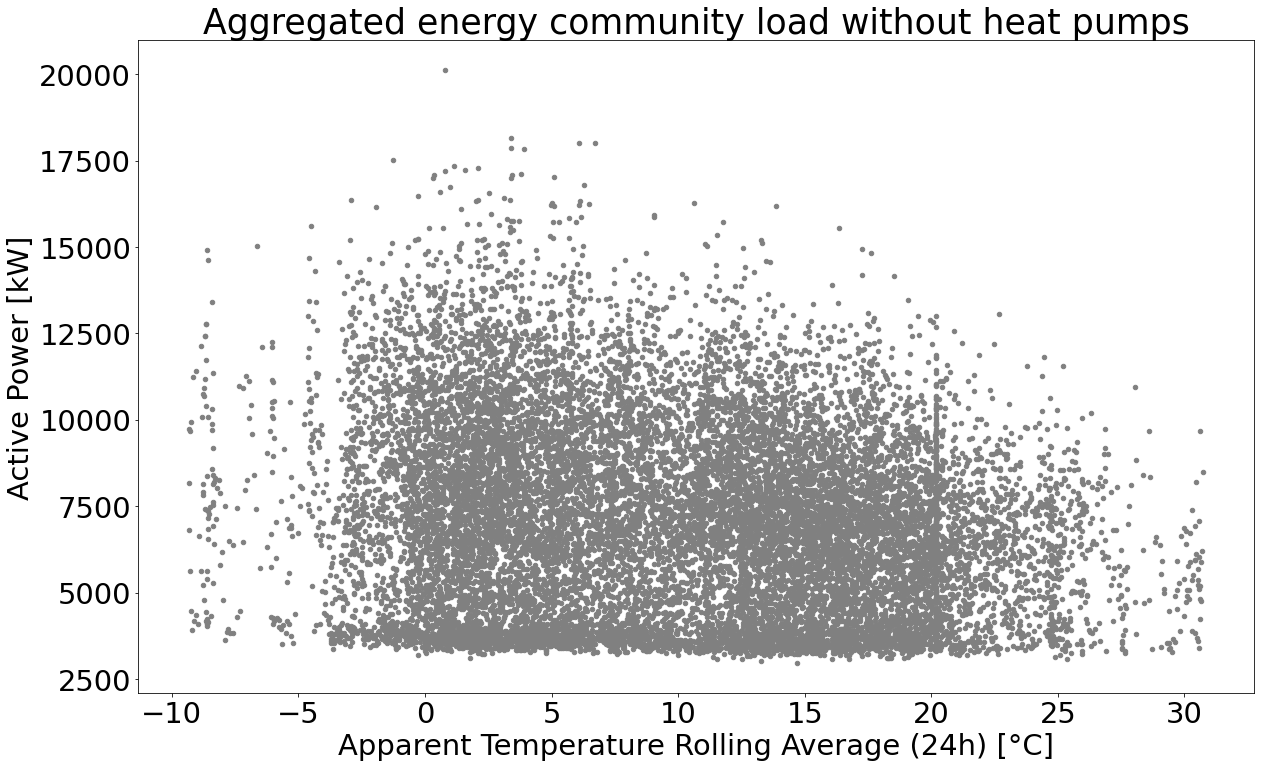

In [42]:
df_hh.plot.scatter(color="grey",ylabel="Active Power [kW]", xlabel="Apparent Temperature Rolling Average (24h) [°C]", x="APPARENT_TEMPERATURE:TOTAL ROLLING 24",y="Agg Load",figsize=(20,12),title="Aggregated energy community load without heat pumps")
plt.savefig('./plots/relationship_without_heatpumps.pdf',bbox_inches='tight')



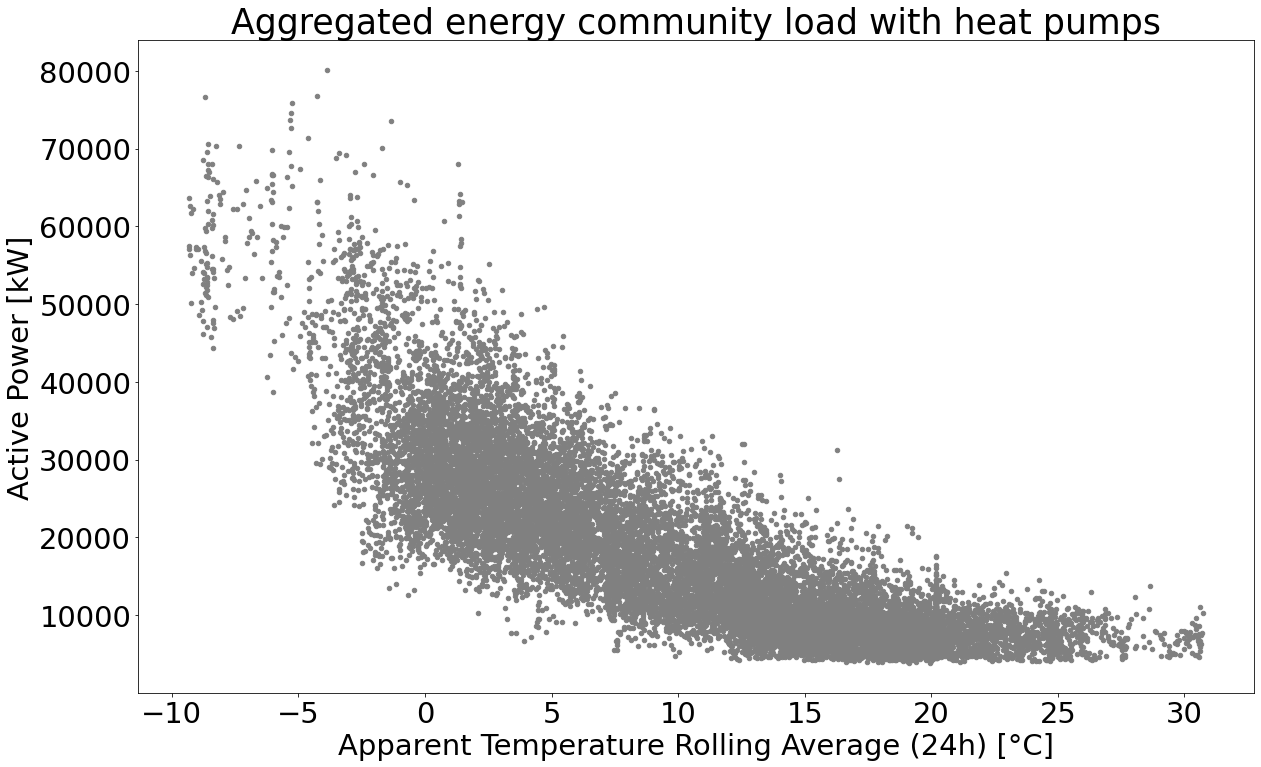

In [43]:
df_comb.plot.scatter(color="grey",ylabel="Active Power [kW]", xlabel="Apparent Temperature Rolling Average (24h) [°C]",x="APPARENT_TEMPERATURE:TOTAL ROLLING 24",y="Agg Load",figsize=(20,12),title="Aggregated energy community load with heat pumps")

plt.savefig('./plots/relationship_with_heatpumps.pdf',bbox_inches='tight')


In [8]:


df_eval = pd.DataFrame()
df_eval.index = df_comb.index
df_eval["Households"] = df_hh["Agg Load"].values
df_eval["Heat pumps"] = df_hp["Agg Load"].values



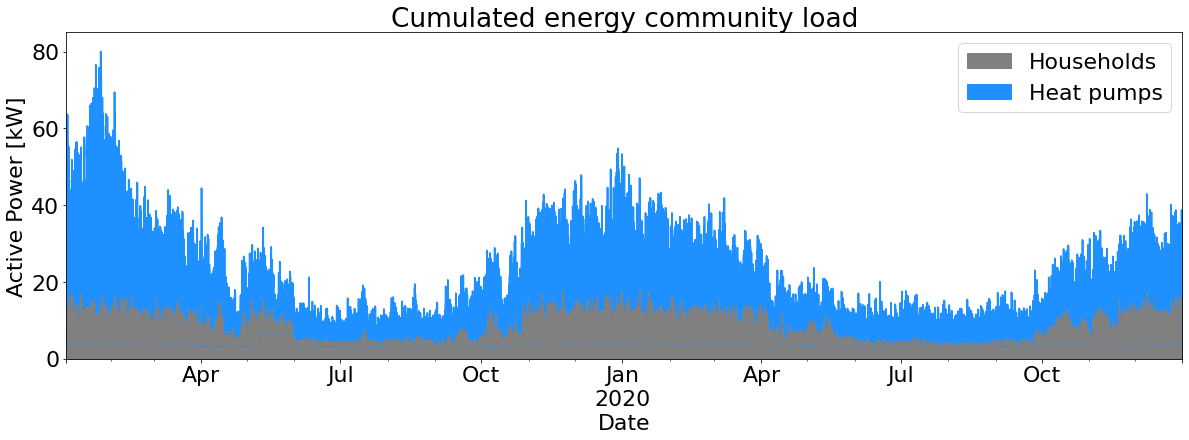

In [9]:
plt.rcParams.update({'font.size': 22})

df_eval.applymap(lambda x:x/1000).plot.area(figsize=(20,6),ylim=(0,85),title="Cumulated energy community load",ylabel="Active Power [kW]",color=["grey","dodgerblue"],xlabel="Date")

plt.savefig('./plots/agg_yearly.png')




<AxesSubplot: xlabel='date'>

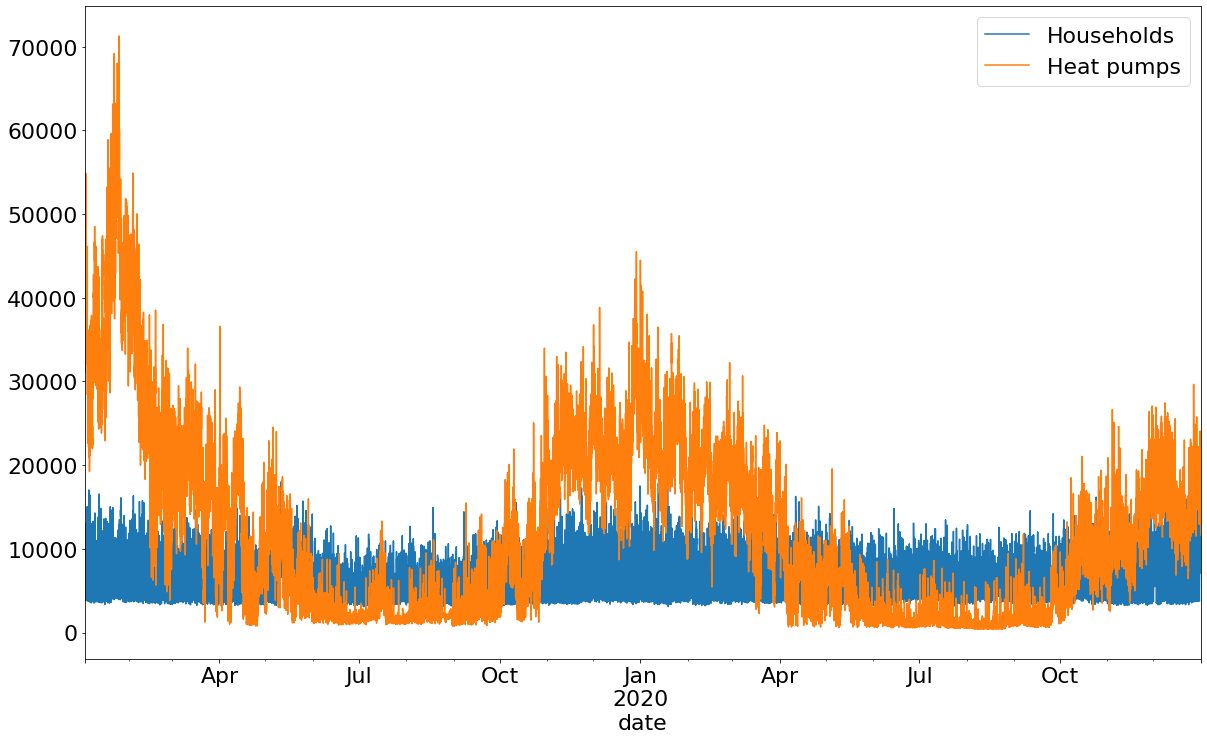

In [10]:
df_eval.plot(figsize=(20,12))

In [11]:
load_factor_df = pd.DataFrame({})

load_factor_df["Before HP Mean"] = df_hh.groupby(pd.PeriodIndex(df_hh.index, freq="M"))['Agg Load'].mean()
load_factor_df["After HP Mean"] = df_comb.groupby(pd.PeriodIndex(df_comb.index, freq="M"))['Agg Load'].mean()
load_factor_df["Before HP Max"] = df_hh.groupby(pd.PeriodIndex(df_hh.index, freq="M"))['Agg Load'].max()
load_factor_df["After HP Max Max"] = df_comb.groupby(pd.PeriodIndex(df_comb.index, freq="M"))['Agg Load'].max()
load_factor_df["Load Factors without Heat Pumps"] = load_factor_df["Before HP Mean"]/ load_factor_df["Before HP Max"]
load_factor_df["Load Factors with Heat Pumps"] = load_factor_df["After HP Mean"]/load_factor_df["After HP Max Max"]

Text(0.5, 0, '')

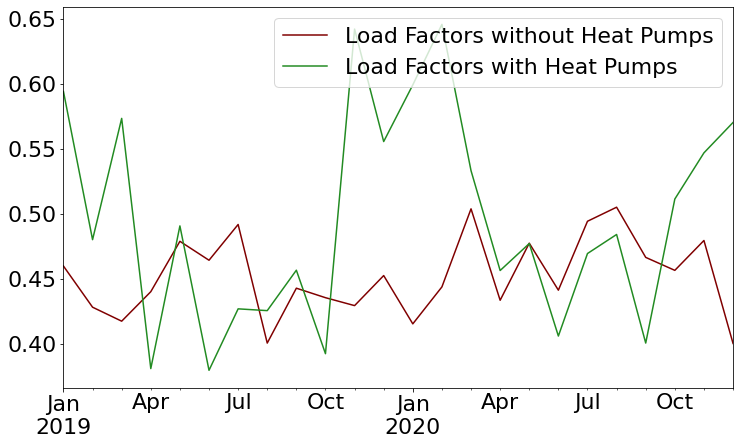

In [12]:


color_synth = "maroon"
color_real = "forestgreen" 
ax = load_factor_df[["Load Factors without Heat Pumps","Load Factors with Heat Pumps"]].plot(figsize=(12,7),color=[color_synth,color_real])
ax.set_xlabel("")

In [13]:
df_synthetic_mean = df_hh["Agg Load"].mean()
df_real_mean = df_comb["Agg Load"].mean()

df_ldc = df_hh.copy()
df_ldc["Load without heat pumps"] = df_hh["Agg Load"] / df_synthetic_mean
df_ldc["Load with heat pumps"] = df_comb["Agg Load"] / df_real_mean

<AxesSubplot: ylabel='Density'>

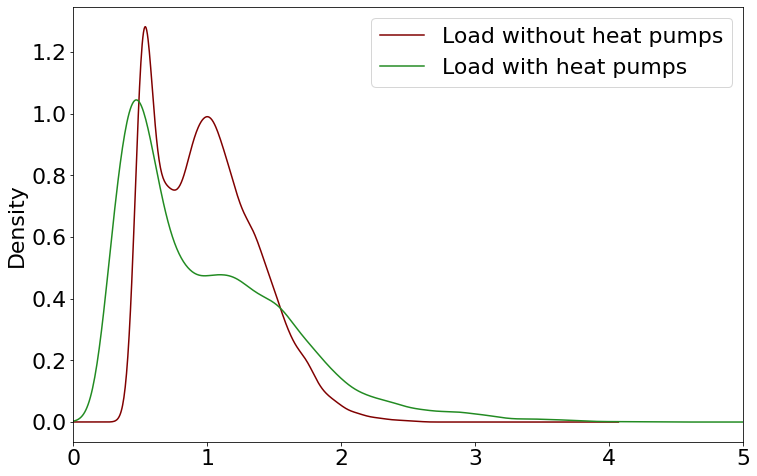

In [14]:
df_ldc[["Load without heat pumps","Load with heat pumps"]].plot(kind="kde",xlim=(0,5),figsize=(12,8),color=[color_synth,color_real])

In [15]:
df_underlying = pd.read_pickle("./data/1920 Final Data w. Additional Features HP Hourly Agg.pkl")

In [16]:
df_underlying

,SFH3_P_TOT,SFH4_P_TOT,SFH5_P_TOT,SFH7_P_TOT,SFH9_P_TOT,SFH12_P_TOT,SFH14_P_TOT,SFH16_P_TOT,SFH18_P_TOT,SFH19_P_TOT,...,date_season,hour_sin,hour_cos,hour_sin_2x,hour_cos_2x,hour_sin_4x,hour_cos_4x,day_sin,day_cos,Agg Load_
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,148.148,923.038,907.788,70.112,1833.511,437.897,2096.380,587.331,74.033,495.187,...,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.866,0.500,19945.438
2019-01-01 01:00:00+00:00,13.133,717.543,1575.680,176.663,687.577,665.682,2086.971,395.775,218.631,1011.135,...,0.000,0.270,0.963,0.520,0.854,0.888,0.460,0.866,0.500,18582.040
2019-01-01 02:00:00+00:00,529.842,914.519,1353.823,338.231,919.781,1267.310,3193.240,1108.986,43.831,212.301,...,0.000,0.520,0.854,0.888,0.460,0.817,-0.577,0.866,0.500,20651.082
2019-01-01 03:00:00+00:00,666.430,744.314,579.952,1116.843,1756.308,11.654,2415.962,389.224,622.281,423.514,...,0.000,0.731,0.683,0.998,-0.068,-0.136,-0.991,0.866,0.500,19975.895
2019-01-01 04:00:00+00:00,375.519,927.068,856.377,70.915,689.637,1104.760,3378.762,391.409,367.376,361.857,...,0.000,0.888,0.460,0.817,-0.577,-0.942,-0.335,0.866,0.500,22523.545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00+00:00,241.614,1117.551,1275.690,372.067,1794.069,745.513,1668.996,540.843,414.980,813.669,...,0.000,-0.888,0.460,-0.817,-0.577,0.942,-0.335,0.000,-1.000,19897.532
2020-12-31 20:00:00+00:00,11.210,1339.585,698.189,733.249,1575.483,725.058,642.653,356.634,403.156,1101.410,...,0.000,-0.731,0.683,-0.998,-0.068,0.136,-0.991,0.000,-1.000,15857.052
2020-12-31 21:00:00+00:00,847.438,922.994,672.130,69.329,1474.484,480.060,671.985,732.140,400.533,806.799,...,0.000,-0.520,0.854,-0.888,0.460,-0.817,-0.577,0.000,-1.000,15411.270


In [17]:
df_underlying.columns

Index(['SFH3_P_TOT', 'SFH4_P_TOT', 'SFH5_P_TOT', 'SFH7_P_TOT', 'SFH9_P_TOT',
       'SFH12_P_TOT', 'SFH14_P_TOT', 'SFH16_P_TOT', 'SFH18_P_TOT',
       'SFH19_P_TOT', 'SFH20_P_TOT', 'SFH21_P_TOT', 'SFH22_P_TOT',
       'SFH27_P_TOT', 'SFH28_P_TOT', 'SFH29_P_TOT', 'SFH30_P_TOT',
       'SFH32_P_TOT', 'SFH34_P_TOT', 'SFH36_P_TOT', 'SFH38_P_TOT',
       'SFH39_P_TOT', 'APPARENT_TEMPERATURE:TOTAL',
       'ATMOSPHERIC_PRESSURE:TOTAL', 'PRECIPITATION_RATE:TOTAL',
       'PROBABILITY_OF_PRECIPITATION:TOTAL', 'RELATIVE_HUMIDITY:TOTAL',
       'TEMPERATURE:TOTAL', 'WIND_DIRECTION:TOTAL', 'WIND_GUST_SPEED:TOTAL',
       'APPARENT_TEMPERATURE:TOTAL FORECAST',
       'ATMOSPHERIC_PRESSURE:TOTAL FORECAST',
       'PRECIPITATION_RATE:TOTAL FORECAST',
       'PROBABILITY_OF_PRECIPITATION:TOTAL FORECAST',
       'RELATIVE_HUMIDITY:TOTAL FORECAST', 'TEMPERATURE:TOTAL FORECAST',
       'WIND_DIRECTION:TOTAL FORECAST', 'WIND_GUST_SPEED:TOTAL FORECAST',
       'date_month_sin', 'date_month_cos', 'date_yea

<AxesSubplot: xlabel='date'>

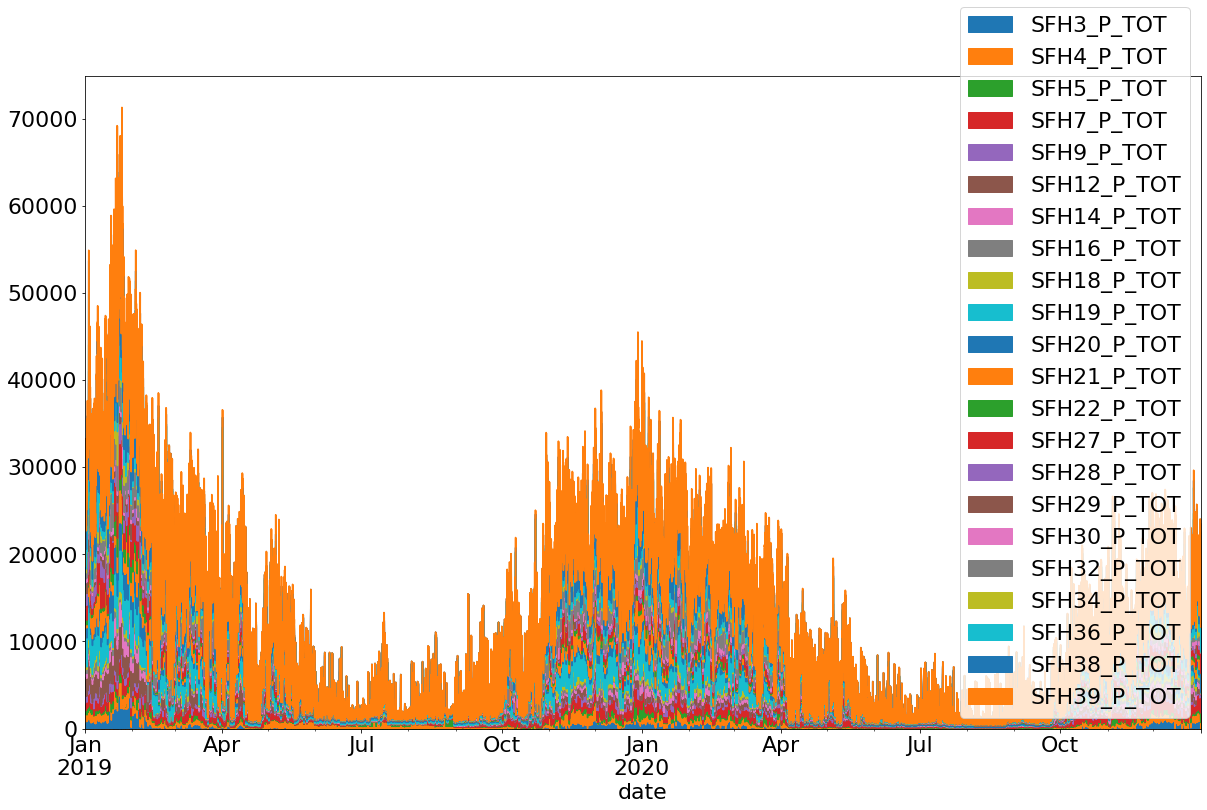

In [18]:
df_underlying[['SFH3_P_TOT', 'SFH4_P_TOT', 'SFH5_P_TOT', 'SFH7_P_TOT', 'SFH9_P_TOT',
       'SFH12_P_TOT', 'SFH14_P_TOT', 'SFH16_P_TOT', 'SFH18_P_TOT',
       'SFH19_P_TOT', 'SFH20_P_TOT', 'SFH21_P_TOT', 'SFH22_P_TOT',
       'SFH27_P_TOT', 'SFH28_P_TOT', 'SFH29_P_TOT', 'SFH30_P_TOT',
       'SFH32_P_TOT', 'SFH34_P_TOT', 'SFH36_P_TOT', 'SFH38_P_TOT',
       'SFH39_P_TOT']].plot.area(figsize=(20,12))

<AxesSubplot: xlabel='date'>

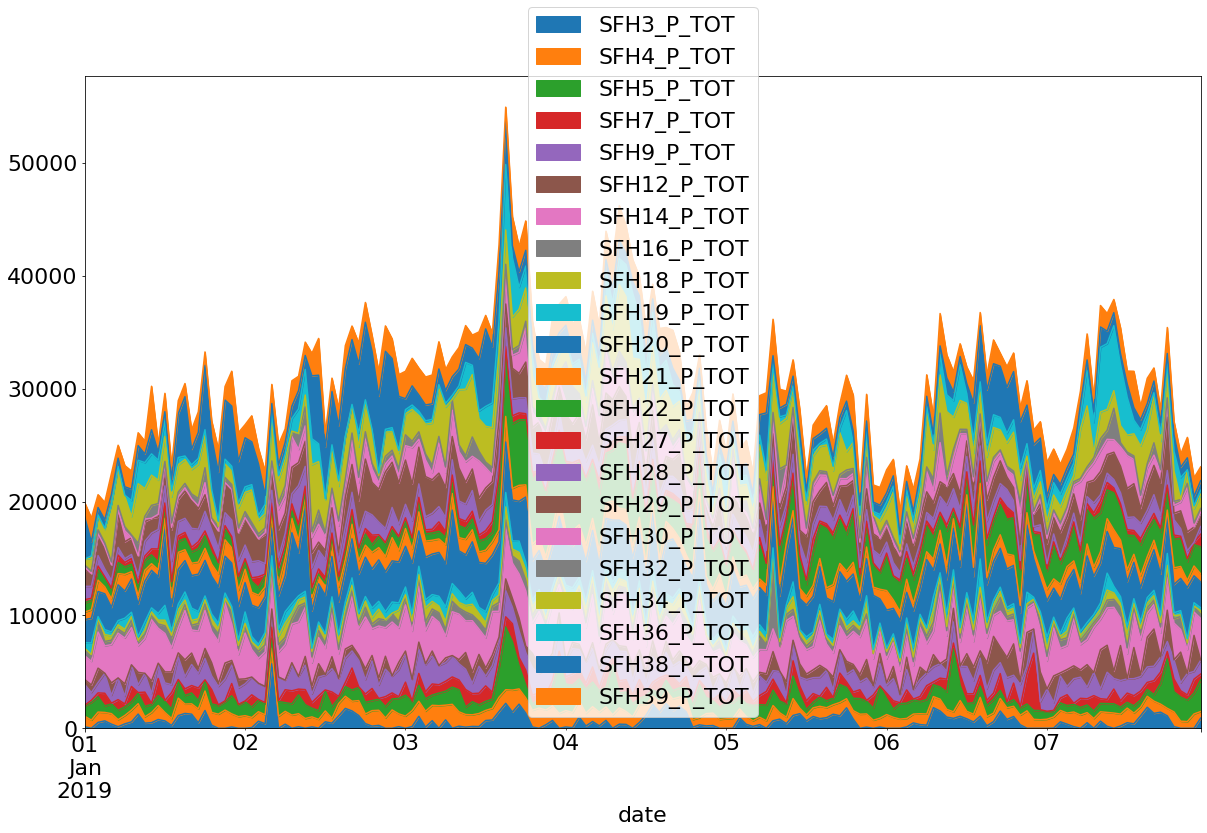

In [19]:
df_underlying[['SFH3_P_TOT', 'SFH4_P_TOT', 'SFH5_P_TOT', 'SFH7_P_TOT', 'SFH9_P_TOT',
       'SFH12_P_TOT', 'SFH14_P_TOT', 'SFH16_P_TOT', 'SFH18_P_TOT',
       'SFH19_P_TOT', 'SFH20_P_TOT', 'SFH21_P_TOT', 'SFH22_P_TOT',
       'SFH27_P_TOT', 'SFH28_P_TOT', 'SFH29_P_TOT', 'SFH30_P_TOT',
       'SFH32_P_TOT', 'SFH34_P_TOT', 'SFH36_P_TOT', 'SFH38_P_TOT',
       'SFH39_P_TOT']].iloc[:24*7].plot.area(figsize=(20,12))

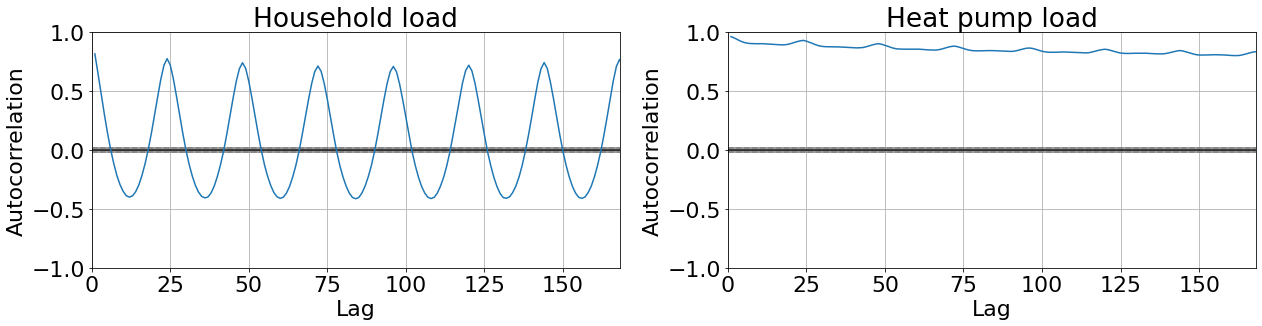

In [22]:
plt.rcParams.update({'font.size': 22})

hh_load = df_hh["Agg Load"]
hp_load= df_hp["Agg Load"]
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
pd.plotting.autocorrelation_plot(hh_load).set_xlim([0, 24*7])
plt.title('Household load')

plt.subplot(1, 2, 2)
pd.plotting.autocorrelation_plot(hp_load).set_xlim([0, 24*7])
plt.title('Heat pump load')



plt.tight_layout()
plt.show()

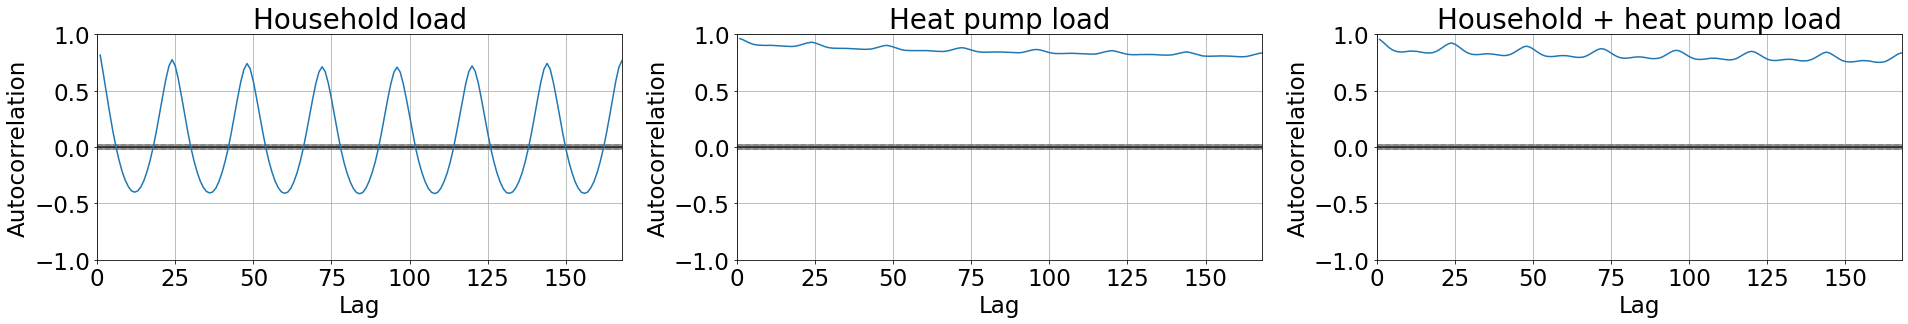

In [29]:

# Plotting
plt.rcParams.update({'font.size': 23})
hh_load = df_hh["Agg Load"]
hp_load = df_hp["Agg Load"]
ldc_load = df_ldc["Load with heat pumps"]

plt.figure(figsize=(27, 5))

# First subplot for Household load
plt.subplot(1, 3, 1)
pd.plotting.autocorrelation_plot(hh_load).set_xlim([0, 24*7])
plt.title('Household load')

# Second subplot for Heat pump load
plt.subplot(1, 3, 2)
pd.plotting.autocorrelation_plot(hp_load).set_xlim([0, 24*7])
plt.title('Heat pump load')

# Third subplot for Load with heat pumps
plt.subplot(1, 3, 3)
pd.plotting.autocorrelation_plot(ldc_load).set_xlim([0, 24*7])
plt.title('Household + heat pump load')

plt.tight_layout()
plt.show()